In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [7]:
online_rt = pd.read_csv('Online_Retail.csv', encoding='latin1')

In [9]:
online_rt

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


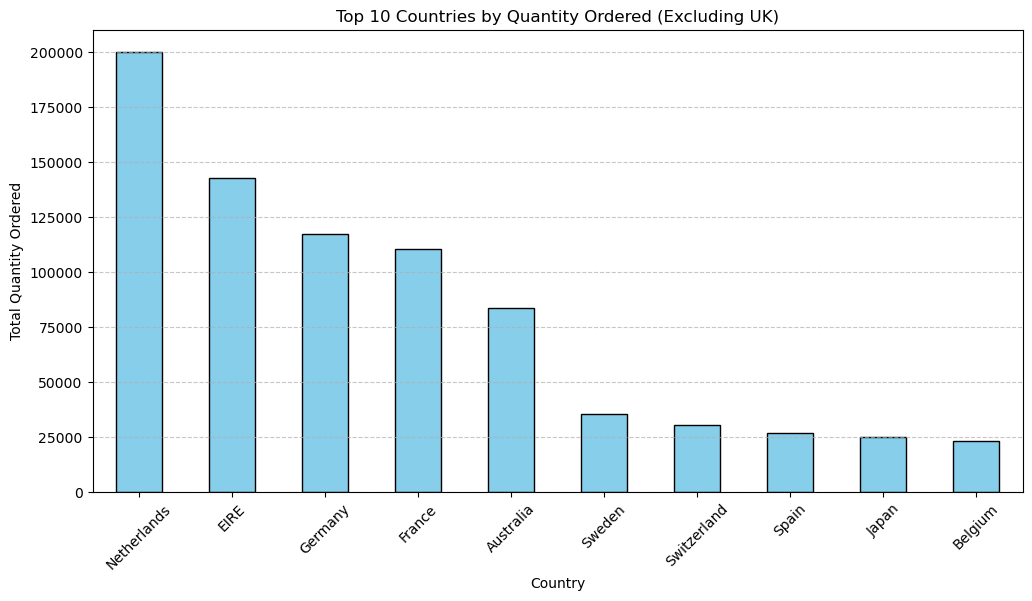

In [11]:
country_quantity = online_rt.groupby('Country')['Quantity'].sum()

country_quantity = country_quantity[country_quantity.index != 'United Kingdom']

top_10 = country_quantity.sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
top_10.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Top 10 Countries by Quantity Ordered (Excluding UK)')
plt.xlabel('Country')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [13]:
online_rt = online_rt[online_rt['Quantity'] > 0]

In [15]:
online_rt

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


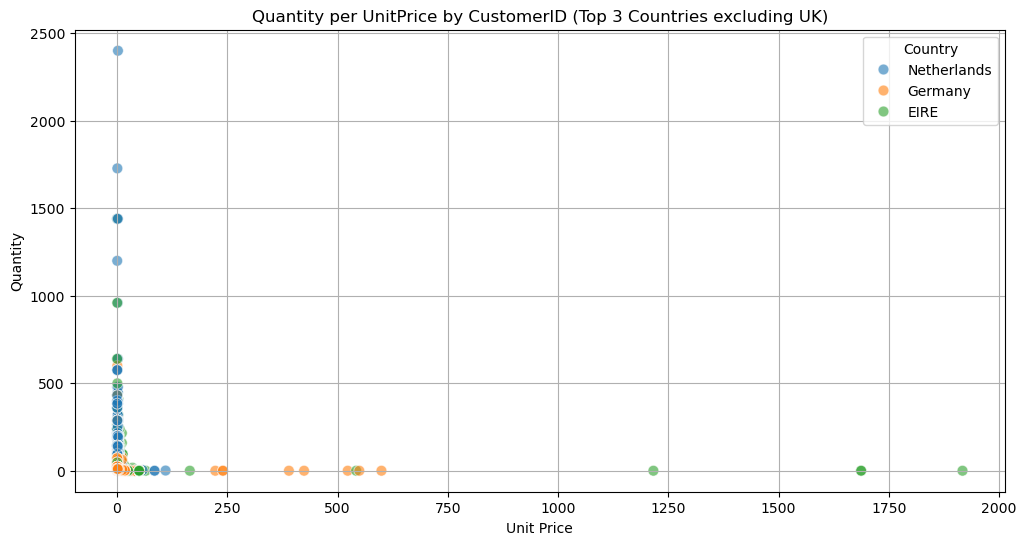

In [17]:
online_rt = online_rt[online_rt['Country'] != 'United Kingdom']

top_countries = (
    online_rt.groupby('Country')['Quantity']
    .sum()
    .sort_values(ascending=False)
    .head(3)
    .index
)

filtered_data = online_rt[online_rt['Country'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=filtered_data,
    x='UnitPrice',
    y='Quantity',
    hue='Country',
    alpha=0.6,
    s=60
)

plt.title('Quantity per UnitPrice by CustomerID (Top 3 Countries excluding UK)')
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.grid(True)
plt.legend(title='Country')
plt.show()

In [23]:
filtered_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
385,536403,22867,HAND WARMER BIRD DESIGN,96,12/1/10 11:27,1.85,12791.0,Netherlands
386,536403,POST,POSTAGE,1,12/1/10 11:27,15.00,12791.0,Netherlands
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,12/1/10 13:04,2.95,12662.0,Germany
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,12/1/10 13:04,2.55,12662.0,Germany
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,12/1/10 13:04,0.85,12662.0,Germany


In [25]:
print(filtered_data['UnitPrice'].dtype)

float64


In [31]:
online_rt[online_rt['CustomerID'].isin([12346.0, 12347.0])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/10 14:57,2.10,12347.0,Iceland
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/7/10 14:57,4.25,12347.0,Iceland
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/7/10 14:57,3.25,12347.0,Iceland
14941,537626,22492,MINI PAINT SET VINTAGE,36,12/7/10 14:57,0.65,12347.0,Iceland
14942,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,12/7/10 14:57,1.25,12347.0,Iceland
...,...,...,...,...,...,...,...,...
535010,581180,20719,WOODLAND CHARLOTTE BAG,10,12/7/11 15:52,0.85,12347.0,Iceland
535011,581180,21265,PINK GOOSE FEATHER TREE 60CM,12,12/7/11 15:52,1.95,12347.0,Iceland
535012,581180,23271,CHRISTMAS TABLE SILVER CANDLE SPIKE,16,12/7/11 15:52,0.83,12347.0,Iceland
535013,581180,23506,MINI PLAYING CARDS SPACEBOY,20,12/7/11 15:52,0.42,12347.0,Iceland


In [35]:
online_rt_clean = online_rt[online_rt['Quantity'] > 0]
online_rt_clean = online_rt_clean[online_rt_clean['Country'] != 'United Kingdom']

top_countries_by_volume = (
    online_rt_clean.groupby('Country')['Quantity']
    .sum()
    .sort_values(ascending=False)
    .head(3)
)

print(top_countries_by_volume)


Country
Netherlands    200937
EIRE           147447
Germany        119263
Name: Quantity, dtype: int64


In [37]:
online_rt = online_rt[(online_rt['Quantity'] > 0) & (online_rt['UnitPrice'] > 0)]
online_rt['Revenue'] = online_rt['Quantity'] * online_rt['UnitPrice']
online_rt[['CustomerID', 'Quantity', 'UnitPrice', 'Revenue']].head()

,CustomerID,Quantity,UnitPrice,Revenue
26,12583.0,24,3.75,90.0
27,12583.0,24,3.75,90.0
28,12583.0,12,3.75,45.0
29,12583.0,12,0.85,10.2
30,12583.0,24,0.65,15.6


In [39]:
online_rt = online_rt[online_rt['Country'] != 'United Kingdom']

top_countries = (
    online_rt.groupby('Country')['Quantity']
    .sum()
    .sort_values(ascending=False)
    .head(3)
    .index
)


In [41]:
filtered = online_rt[online_rt['Country'].isin(top_countries)]
customer_summary = (
    filtered.groupby(['Country', 'CustomerID']).agg({
        'Quantity': 'sum',
        'Revenue': 'sum'
    })
    .reset_index()
)

customer_summary['AvgUnitPrice'] = customer_summary['Revenue'] / customer_summary['Quantity']


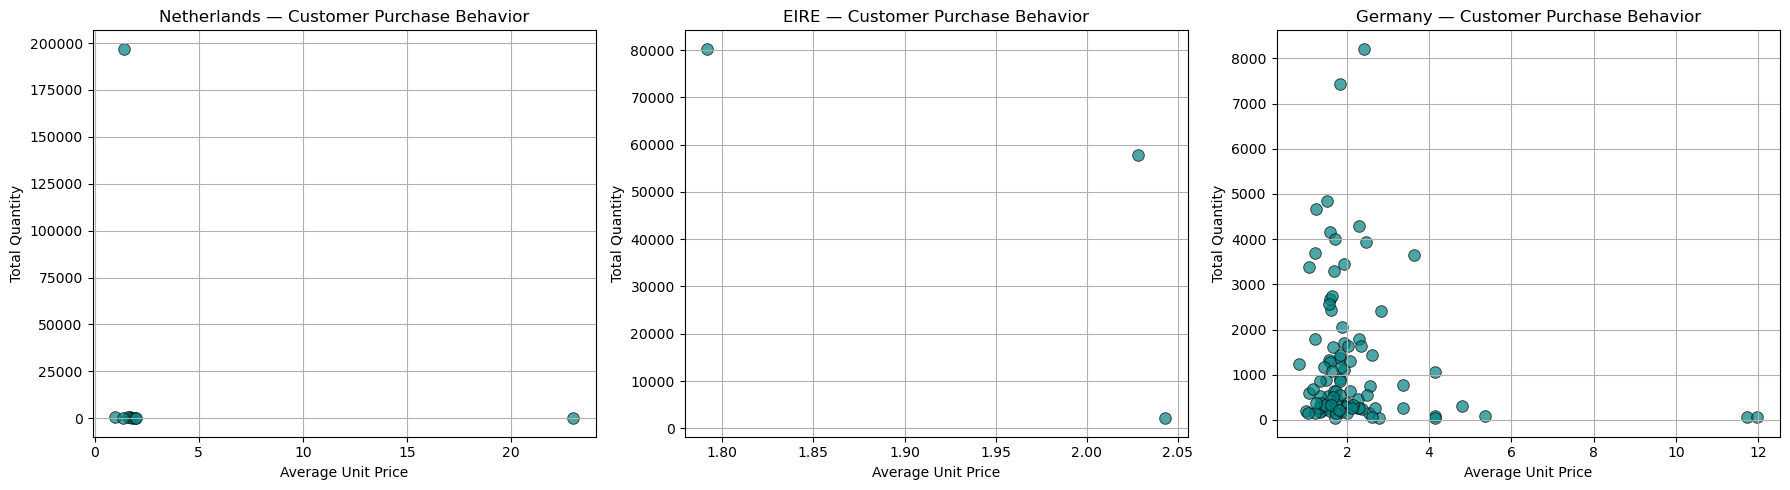

In [43]:
plt.figure(figsize=(18, 5))

for i, country in enumerate(top_countries):
    plt.subplot(1, 3, i + 1)
    data = customer_summary[customer_summary['Country'] == country]
    
    sns.scatterplot(
        x='AvgUnitPrice',
        y='Quantity',
        data=data,
        color='teal',
        alpha=0.7,
        s=70,
        edgecolor='black'
    )
    
    plt.title(f'{country} — Customer Purchase Behavior')
    plt.xlabel('Average Unit Price')
    plt.ylabel('Total Quantity')
    plt.grid(True)

plt.tight_layout()
plt.show()

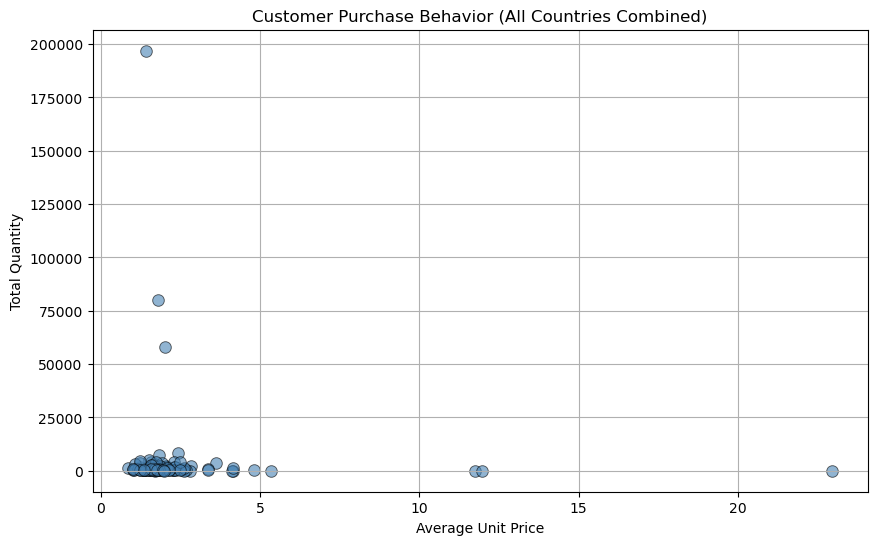

In [45]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=customer_summary,
    x='AvgUnitPrice',
    y='Quantity',
    alpha=0.6,
    color='steelblue',
    s=70,
    edgecolor='black'
)

plt.title('Customer Purchase Behavior (All Countries Combined)')
plt.xlabel('Average Unit Price')
plt.ylabel('Total Quantity')
plt.grid(True)
plt.show()

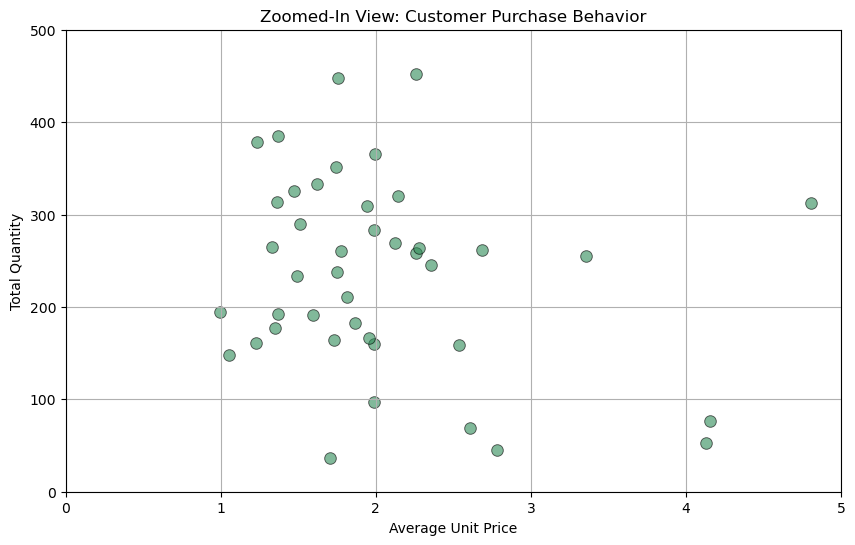

In [47]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=customer_summary,
    x='AvgUnitPrice',
    y='Quantity',
    alpha=0.6,
    color='seagreen',
    s=70,
    edgecolor='black'
)

# تقييد المحاور
plt.xlim(0, 5)
plt.ylim(0, 500)

plt.title('Zoomed-In View: Customer Purchase Behavior')
plt.xlabel('Average Unit Price')
plt.ylabel('Total Quantity')
plt.grid(True)
plt.show()

In [51]:
bins = np.arange(0, 51, 1)
labels = bins[:-1]
online_rt['PriceBin'] = pd.cut(online_rt['UnitPrice'], bins=bins, labels=labels, right=False)
price_groups = online_rt.groupby('PriceBin', observed=True).agg({
    'Quantity': 'sum',
    'Revenue': 'sum'
}).reset_index()
price_groups.head()

,PriceBin,Quantity,Revenue
0,0,370913,201580.43
1,1,340671,500821.04
2,2,109036,269139.86
3,3,39970,144074.29
4,4,31988,143901.25


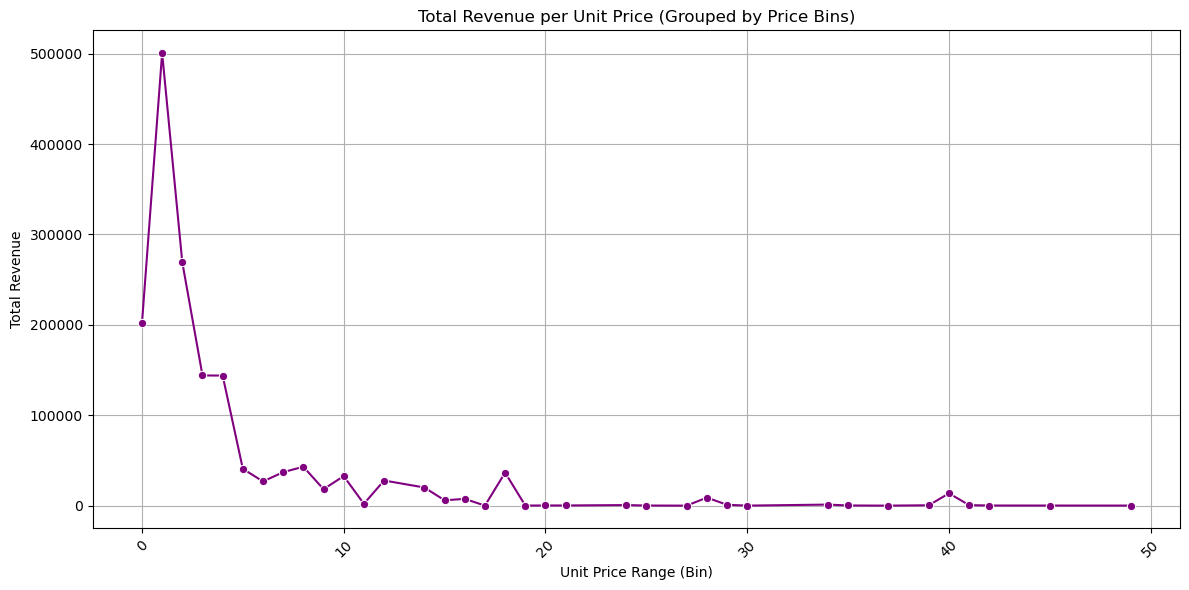

In [53]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=price_groups, x='PriceBin', y='Revenue', marker='o', color='purple')

plt.title('Total Revenue per Unit Price (Grouped by Price Bins)')
plt.xlabel('Unit Price Range (Bin)')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

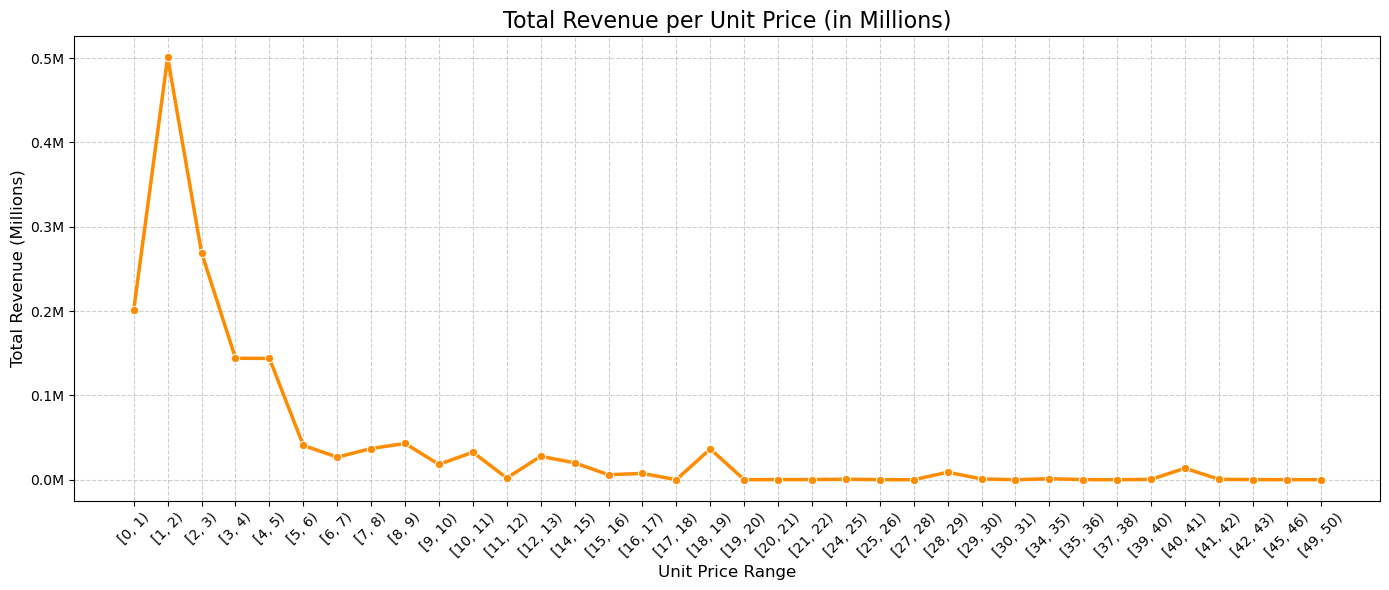

In [67]:
price_groups['PriceBin'] = price_groups['PriceBin'].astype(str)

plt.figure(figsize=(14, 6))
sns.lineplot(
    data=price_groups,
    x='PriceBin',
    y='Revenue',
    marker='o',
    linewidth=2.5,
    color='darkorange'
)

def millions_formatter(x, pos):
    return f'{x*1e-6:.1f}M'

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title('Total Revenue per Unit Price (in Millions)', fontsize=16)
plt.xlabel('Unit Price Range', fontsize=12)
plt.ylabel('Total Revenue (Millions)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#

boxplot to onlne_rt Quantity

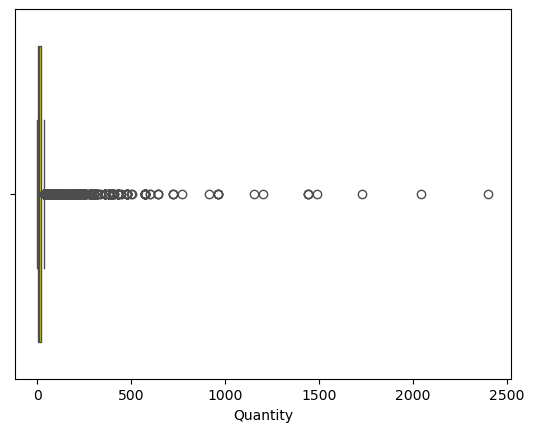

In [75]:
sns.boxplot(x=online_rt['Quantity'],color='Yellow')
plt.show()